# Ch_02_Q10 in p.67

This exercise involves the Boston housing data set.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Question A

To begin, load in the Boston data set, which is part of the ISLP
library.

In [2]:
!pip install ISLP

In [3]:
from ISLP import load_data
boston = load_data('Boston')
print(boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


## Question B

How many rows are in this data set? How many columns? What do the rows and columns represent?

In [4]:
#Check the dimensions of the dataset (number of rows and columns)
print(f"Boston dataset has {boston.shape[0]} rows and {boston.shape[1]} columns.", end='\n\n')

# Check the column names to understand what each represents
print(f"Each row represents a suburb in Boston.", end='\n\n')
print(boston.columns, end='\n\n')

# Get a summary of the dataset (optional, for more detail)
print(boston.describe())

Boston dataset has 506 rows and 13 columns.

Each row represents a suburb in Boston.

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad     

## Question C

Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

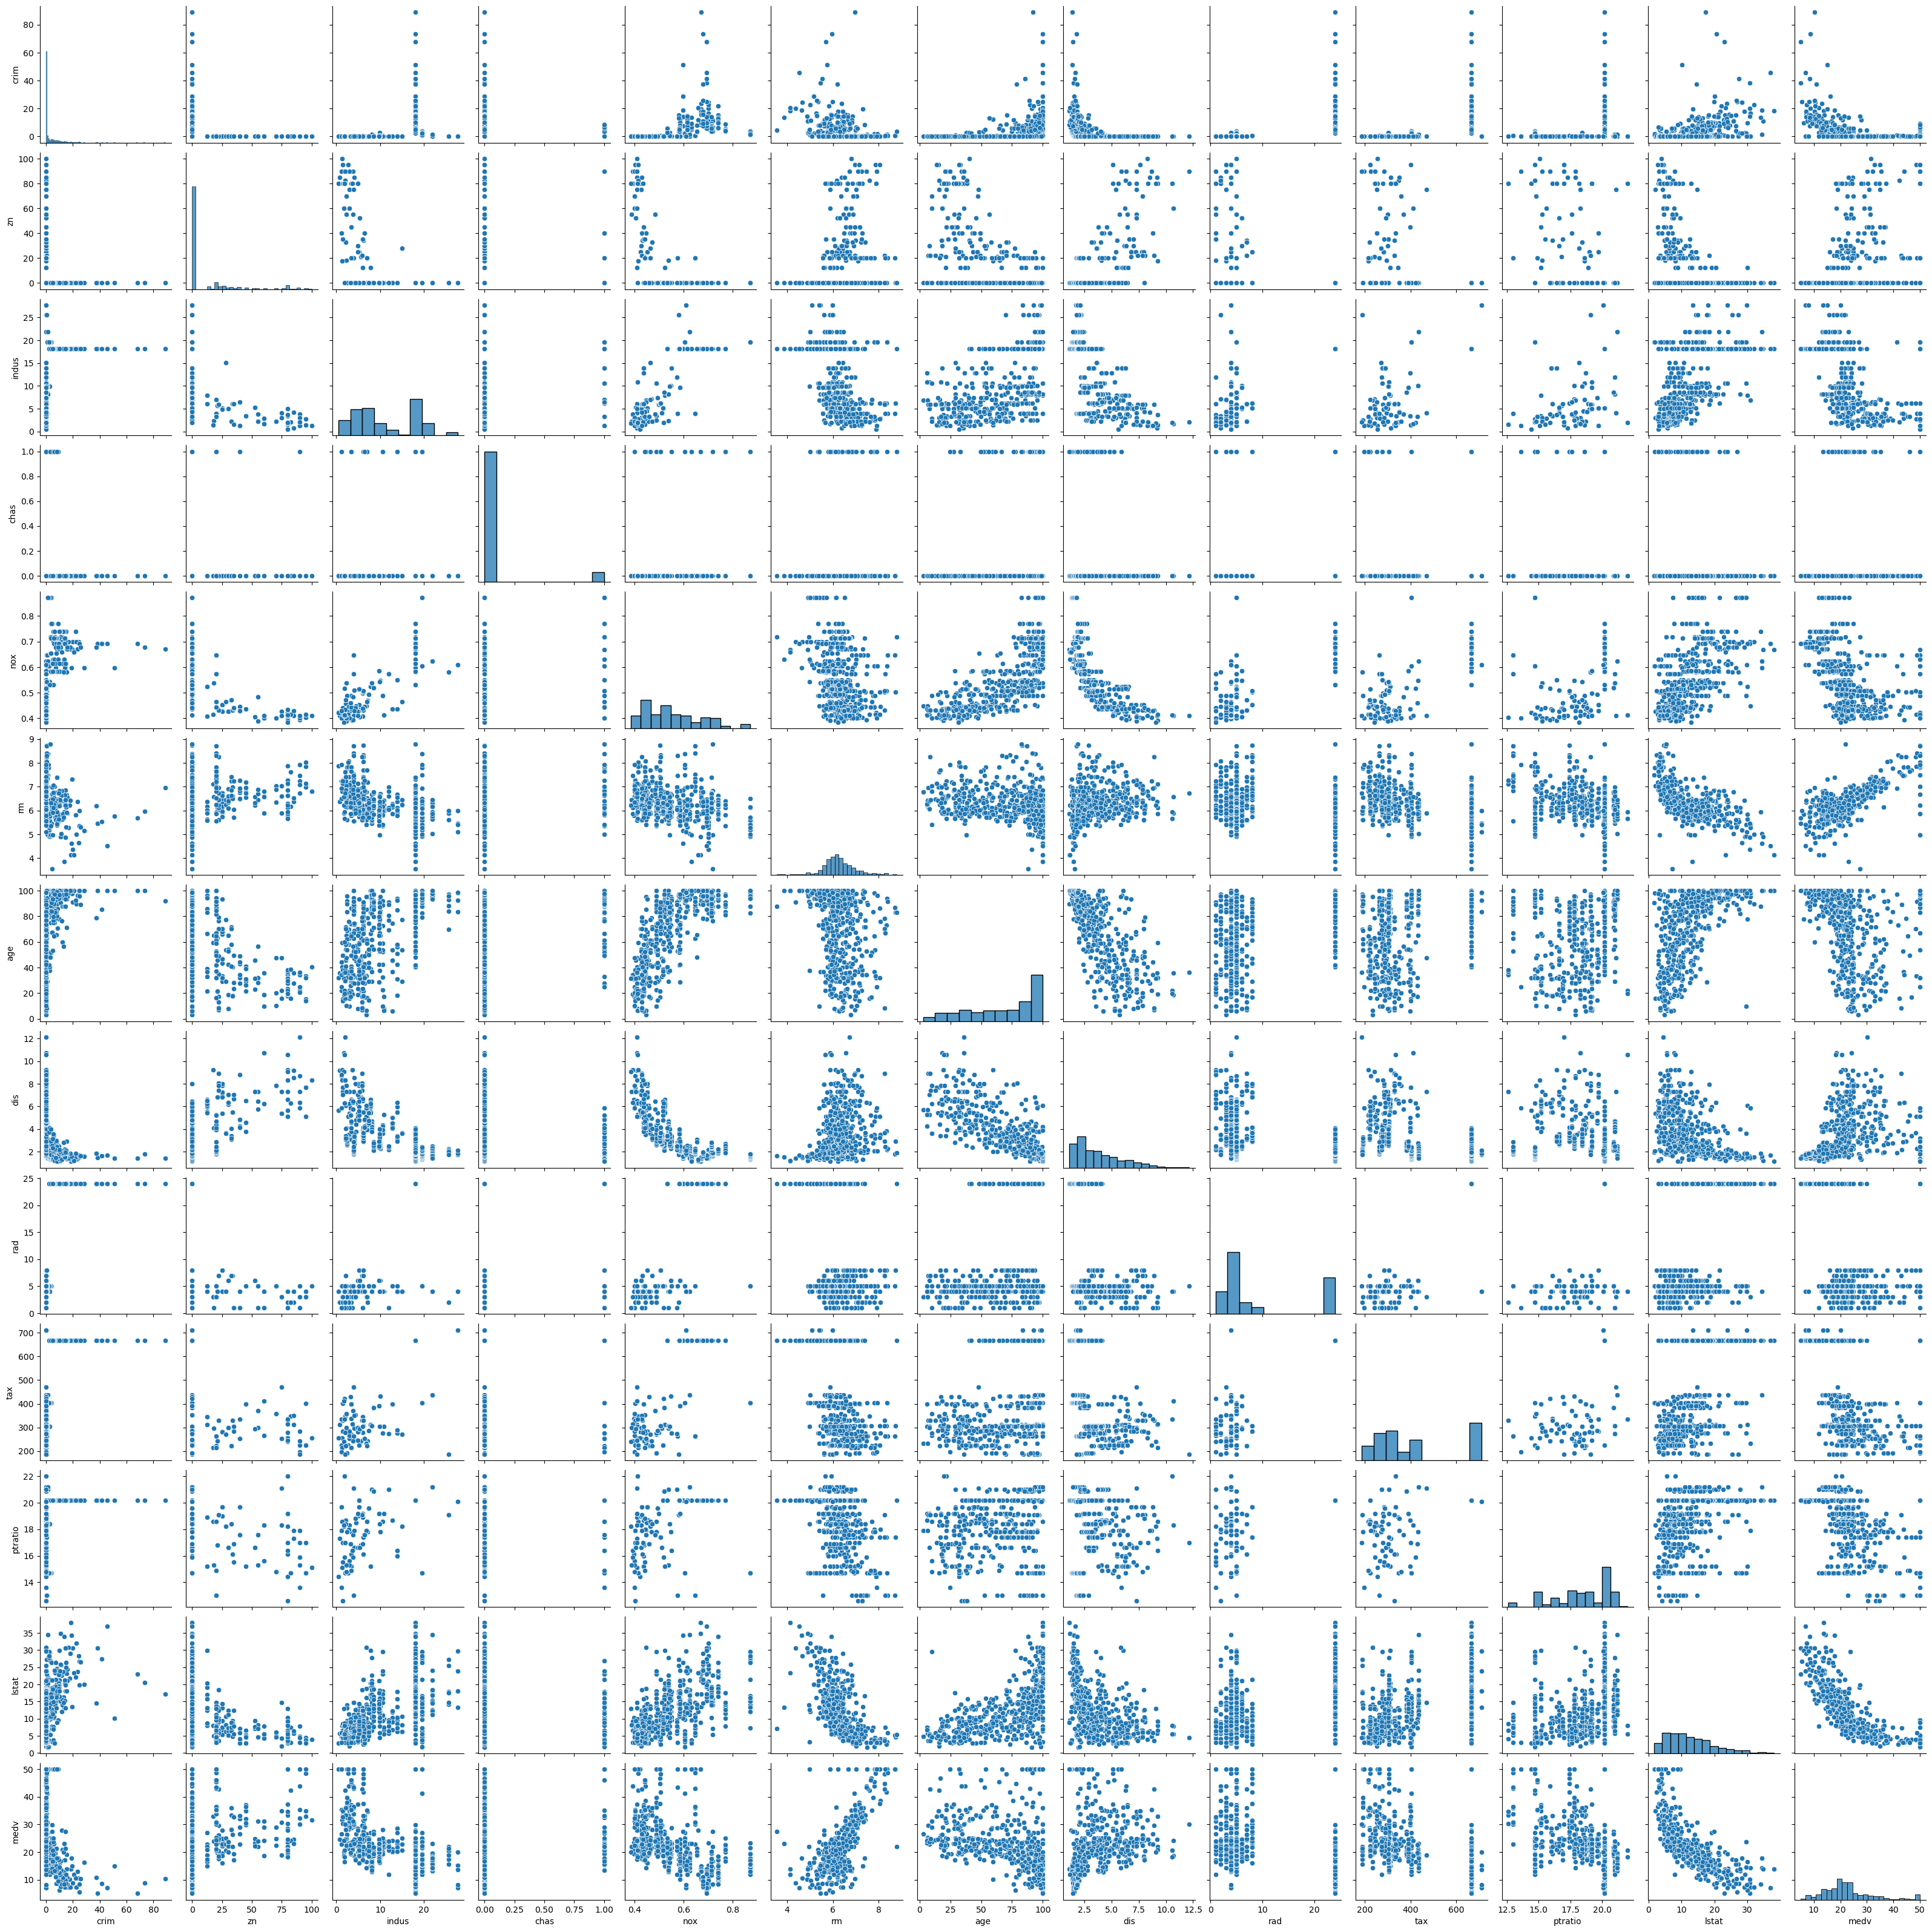

In [5]:
subset = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis'
                 , 'rad', 'tax','ptratio', 'lstat', 'medv']]
# Create pairwise scatterplots
sns.pairplot(subset)
plt.show()

The higher the median value of owner-occupied homes in $1000s, the lower the crime rate.

## Question D

Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

In [6]:
correlation_matrix = boston.corr()

# Display the correlation of crim with other predictors
print(correlation_matrix['crim'].sort_values(ascending=False))

# Visualize scatterplots for variables highly correlated with crim
corr_columns = correlation_matrix['crim'].abs().sort_values(ascending=False).index

crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
Name: crim, dtype: float64


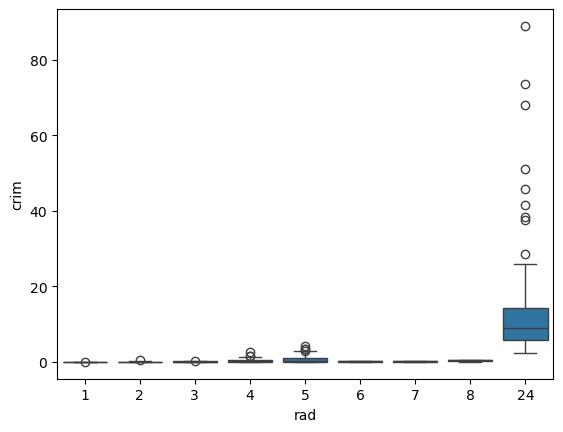

In [7]:
radcrim = sns.boxplot(x="rad", y="crim", data=boston)

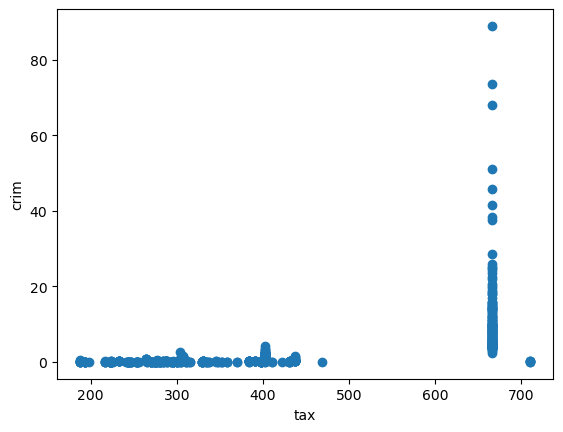

In [8]:
plt.scatter(boston['tax'], boston['crim'])
plt.xlabel('tax')
plt.ylabel('crim');

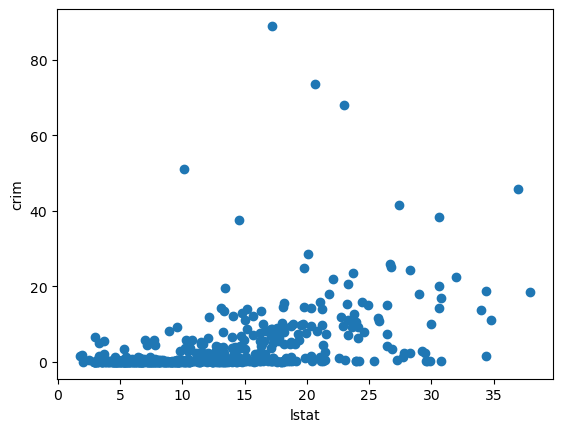

In [9]:
plt.scatter(boston['lstat'], boston['crim'])
plt.xlabel('lstat')
plt.ylabel('crim');


Findings:

rad: When the index of accessibility to radial highways (rad) is at its highest value (24), both the average crime rate and its range increase significantly.
tax: When the property tax rate equals 666, the average crime rate is much higher, with a larger range of crime rates.
lstat: For lower LSTAT values (<10), crime rates (CRIM) are consistently under 10. When LSTAT exceeds 10, the spread of CRIM becomes wider. For LSTAT < 20, many data points are close to CRIM = 0.

## Question E

Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

In [10]:
print(boston.loc[boston['crim'].nlargest(5).index])

        crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
380  88.9762  0.0   18.1     0  0.671  6.968   91.9  1.4165   24  666   
418  73.5341  0.0   18.1     0  0.679  5.957  100.0  1.8026   24  666   
405  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   
410  51.1358  0.0   18.1     0  0.597  5.757  100.0  1.4130   24  666   
414  45.7461  0.0   18.1     0  0.693  4.519  100.0  1.6582   24  666   

     ptratio  lstat  medv  
380     20.2  17.21  10.4  
418     20.2  20.62   8.8  
405     20.2  22.98   5.0  
410     20.2  10.11  15.0  
414     20.2  36.98   7.0  


The suburbs have extremely high crime rate compared to the average mean 3.613524.

In [11]:
print(boston.loc[boston['tax'].nlargest(5).index])

        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
488  0.15086  0.0  27.74     0  0.609  5.454  92.7  1.8209    4  711     20.1   
489  0.18337  0.0  27.74     0  0.609  5.414  98.3  1.7554    4  711     20.1   
490  0.20746  0.0  27.74     0  0.609  5.093  98.0  1.8226    4  711     20.1   
491  0.10574  0.0  27.74     0  0.609  5.983  98.8  1.8681    4  711     20.1   
492  0.11132  0.0  27.74     0  0.609  5.983  83.5  2.1099    4  711     20.1   

     lstat  medv  
488  18.06  15.2  
489  23.97   7.0  
490  29.68   8.1  
491  18.07  13.6  
492  13.35  20.1  


The suburbs have highest tax value which is 711 per 10,000 dollars.

In [12]:
print(boston.loc[boston['ptratio'].nlargest(5).index])

        crim    zn  indus  chas    nox     rm   age      dis  rad  tax  \
354  0.04301  80.0   1.91     0  0.413  5.663  21.9  10.5857    4  334   
355  0.10659  80.0   1.91     0  0.413  5.936  19.5  10.5857    4  334   
127  0.25915   0.0  21.89     0  0.624  5.693  96.0   1.7883    4  437   
128  0.32543   0.0  21.89     0  0.624  6.431  98.8   1.8125    4  437   
129  0.88125   0.0  21.89     0  0.624  5.637  94.7   1.9799    4  437   

     ptratio  lstat  medv  
354     22.0   8.05  18.2  
355     22.0   5.57  20.6  
127     21.2  17.19  16.2  
128     21.2  15.39  18.0  
129     21.2  18.34  14.3  


The suburbs have slighlty higher ptratio compared to the average mean.

## Question F

How many of the suburbs in this data set bound the Charles river?

In [13]:
print(f"There are {boston['chas'].value_counts()[1]} suburbs in this data set bound the Charles river.")

There are 35 suburbs in this data set bound the Charles river.


## Question G

What is the median pupil-teacher ratio among the towns in this data set?

In [14]:
print(f"The median pupil-teacher ration among the towns is {boston['ptratio'].median()}.")

The median pupil-teacher ration among the towns is 19.05.


## Question H

Which suburb of Boston has lowest median value of owner- occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [15]:
print(f"The suburb of Boston with the lowest median value of owner-occupied homes is {boston['medv'].idxmin()} which its value is {boston.loc[boston['medv'].idxmin()]['medv']}.")

The suburb of Boston with the lowest median value of owner-occupied homes is 398 which its value is 5.0.


In [16]:
min_medv_suburb = boston.loc[boston['medv'].idxmin()]
print(f"The other predictors for that suburb are:")
print(min_medv_suburb)   

The other predictors for that suburb are:
crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64


In [17]:
print(boston.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

The suburb with the lowest median house value is marked by extremely high crime rates, high nitrogen oxide pollution, fewer rooms per dwelling, elevated tax rates, a high pupil-teacher ratio, and a large percentage of lower-status population. These factors indicate that the suburb faces severe economic, environmental, and social challenges, which collectively contribute to its significantly low property values.

## Question I

 In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [18]:
print(f"{boston[boston['rm'] > 7].shape[0]} suburbs average more than seven rooms per dwelling.")
print(f"{boston[boston['rm'] > 8].shape[0]} suburbs average more than eight rooms per dwelling.")

64 suburbs average more than seven rooms per dwelling.
13 suburbs average more than eight rooms per dwelling.


In [19]:
rm_greater_than_8 = boston[boston['rm'] > 8]
print(rm_greater_than_8.describe())

            crim         zn      indus       chas        nox         rm  \
count  13.000000  13.000000  13.000000  13.000000  13.000000  13.000000   
mean    0.718795  13.615385   7.078462   0.153846   0.539238   8.348538   
std     0.901640  26.298094   5.392767   0.375534   0.092352   0.251261   
min     0.020090   0.000000   2.680000   0.000000   0.416100   8.034000   
25%     0.331470   0.000000   3.970000   0.000000   0.504000   8.247000   
50%     0.520140   0.000000   6.200000   0.000000   0.507000   8.297000   
75%     0.578340  20.000000   6.200000   0.000000   0.605000   8.398000   
max     3.474280  95.000000  19.580000   1.000000   0.718000   8.780000   

             age        dis        rad         tax    ptratio      lstat  \
count  13.000000  13.000000  13.000000   13.000000  13.000000  13.000000   
mean   71.538462   3.430192   7.461538  325.076923  16.361538   4.310000   
std    24.608723   1.883955   5.332532  110.971063   2.410580   1.373566   
min     8.400000   1

In [20]:
print(boston.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

Suburbs with more than 8 rooms generally have lower crime rates, cleaner environments, and higher zoning for large lots. These areas also tend to have lower property tax rates, better pupil-teacher ratios, and a significantly lower percentage of lower-status populations, indicating a more affluent demographic. Additionally, the median home values in these suburbs are substantially higher compared to the overall average, with many homes reaching the maximum recorded value.